# 基础知识
计算学习理论（computational learning theory）是通过“计算”来研究机器学习的理论，简而言之，其目的是分析学习任务的本质，例如：**在什么条件下可进行有效的学习，需要多少训练样本能获得较好的精度等，从而为机器学习算法提供理论保证**。
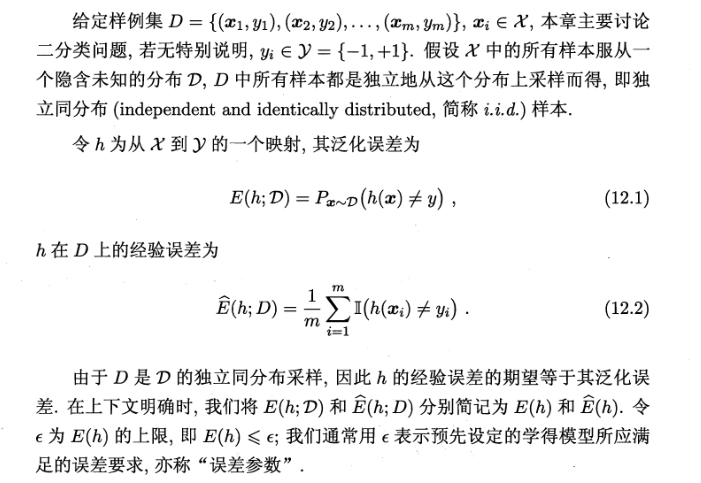

**泛化误差指的是学习器在总体上的预测误差，经验误差则是学习器在某个特定数据集D上的预测误差**。在实际问题中，往往我们并不能得到总体且数据集D是通过独立同分布采样得到的，因此我们常常使用经验误差作为泛化误差的近似。



#  PAC学习

## 定义12.1:PAC 辨识
PAC学习相关理论的一个总结：同等条件下，模型越复杂泛化误差越大。
PAC学习理论不关心假设选择算法，他关心的是能否从假设空间H中学习一个好的假设h。现在我们在来看一下什么叫“好假设”？只要满足两个条件(PAC辨识条件)即可。
（1）近似正确：泛化误差E(h)足够小。E(h)越小越好，最好泛化误差能能于0，但一般是不可能的。那我们就把E(h)限定在一个很小的数ϵ之内，即只要假设h满足E(h)≤ϵ，我们就认为h是正确的。
（2）可能正确。不指望选择的假设h百分之百是近似正确的（即E(h)≤ϵ），只要很可能是近似正确的就可以，即我们给定一个值δ，假设h满足P(h近似正确)≥1−δ。
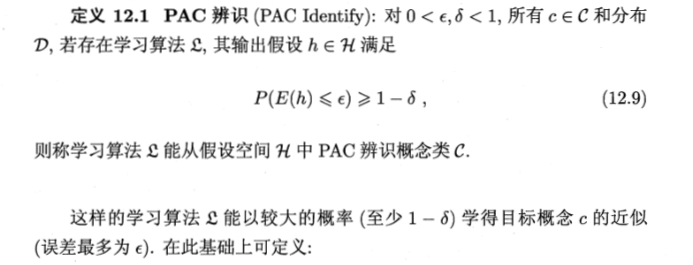

## 定义12.2 PAC 可学习

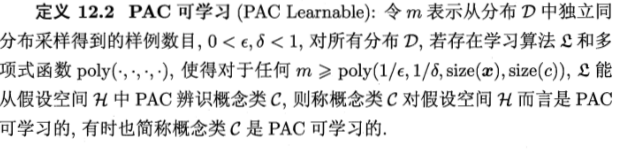


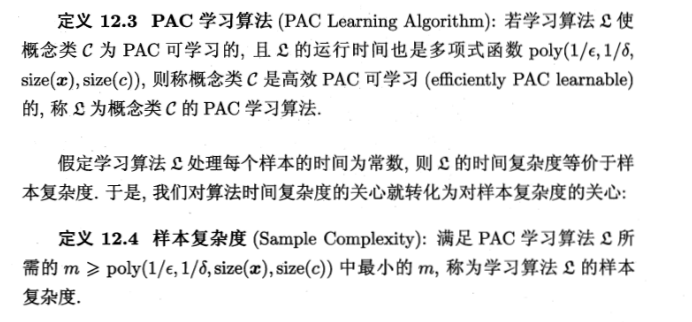

上述关于PAC的几个定义层层相扣：定义12.1表达的是对于某种学习算法，如果能以一个置信度学得假设满足泛化误差的预设上限，则称该算法能PAC辨识概念类，即该算法的输出假设已经十分地逼近目标概念。定义12.2则将样本数量考虑进来，当样本超过一定数量时，学习算法总是能PAC辨识概念类，则称概念类为PAC可学习的。定义12.3将学习器运行时间也考虑进来，若运行时间为多项式时间，则称PAC学习算法。

显然，PAC学习中的一个关键因素就是**假设空间的复杂度**，对于某个学习算法，**若假设空间越大，则其中包含目标概念的可能性也越大，但同时找到某个具体概念的难度也越大**，一般假设空间分为有限假设空间与无限假设空间。

# 有限假设空间

## 可分情形

可分或一致的情形指的是：**目标概念包含在算法的假设空间中**。对于目标概念，在训练集D中的经验误差一定为0，因此首先我们可以想到的是：不断地剔除那些出现预测错误的假设，直到找到经验误差为0的假设即为目标概念。但**由于样本集有限，可能会出现多个假设在D上的经验误差都为0，因此问题转化为：需要多大规模的数据集D才能让学习算法以置信度的概率从这些经验误差都为0的假设中找到目标概念的有效近似**。

**对于可分情形的有限假设空间，目标概念都是PAC可学习的，即当样本数量满足上述条件之后，在与训练集一致的假设中总是可以在1-σ概率下找到目标概念的有效近似。**

## 不可分情形

不可分或不一致的情形指的是：**目标概念不存在于假设空间中**，这时我们就不能像可分情形时那样从假设空间中寻找目标概念的近似。但**当假设空间给定时，必然存一个假设的泛化误差最小，若能找出此假设的有效近似也不失为一个好的目标，这便是不可知学习(agnostic learning)的来源。**



# VC维

现实中的学习任务通常都是无限假设空间，例如d维实数域空间中所有的超平面等，因此要对此种情形进行可学习研究，需要度量**假设空间的复杂度**。这便是**VC维**（Vapnik-Chervonenkis dimension）的来源。

增长函数（growth function）：增长函数表示假设空间 H 对 m 个示例所能赋予标记的最大可能结果数 n 的映射关系。
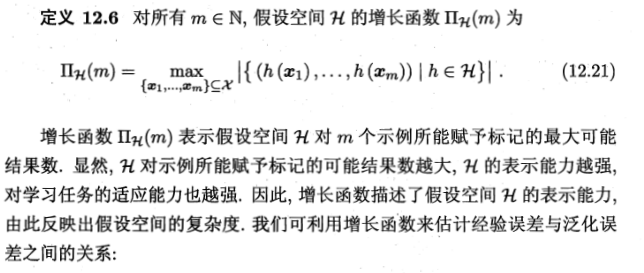

对于二分类问题（结果只有0、1两个），若 m=2，有a，b两个样例，则赋予标记的可能结果最大为4种：a=0,b=0; a=1,b=1; a=0,b=1; a=1,b=0。以此类推当 m=3 时，则可能有8种。但是，这只是最优情况，很多时候假设空间所能赋予的最大可能结果数不是 2 的 m 次方。显然，H 对示例所能赋予的可能结果数越大，H 的表示能力越强，对学习任务的适应能力也越强。因此，增长函数描述了假设空间 H 的表示能力，由此反映出了假设空间的复杂度对分（dichotomy）：对于二分类问题来说，H 中的假设对 D 中示例赋予标记的每种可能结果称为对 D 的一种对分打散（shattering）：若假设空间 H 能实现示例集 D 上的所有对分，即对于 m 个示例的样本集 D 的增长函数等于 2 的 m 次方，则称示例集 D 能被假设空间 H 打散在清晰了以上概念后，我们可以正式定义VC维了：假设空间 H 的VC维是能被 H 打散的最大示例集的大小，记作 VC( H )VC( H ) = d 表明存在大小为 d 的示例集能被假设空间 H 打散，但是需注意：这并不代表所有大小为 d 的示例集都能被空间 H 打散。除此之外，VC维还有一个特点，那就是它与数据分布D无关！因此数据分布未知时我们也可以算出假设空间 H 的VC维举个例子来加深理解一下，对于二维平面的线性划分学习任务，令假设空间 H 表示二维平面上所有的线性划分所构成的集合，输入属性 X 是二维平面的坐标，输出标签 Y 是根据 X 坐标相对应假设 h 的位置而定的，被线性划分到一边的被归为一类，另一边的被归为另一类。由下图可知，存在大小为 3 的示例集可被 H 打散，但不存在大小为 4 的示例集可被 H 打散。于是，该假设空间 H 的 VC 维为 3


# 稳定性

稳定性考察的是当算法的输入发生变化时，输出是否会随之发生较大的变化，输入的数据集D有以下两种变化：
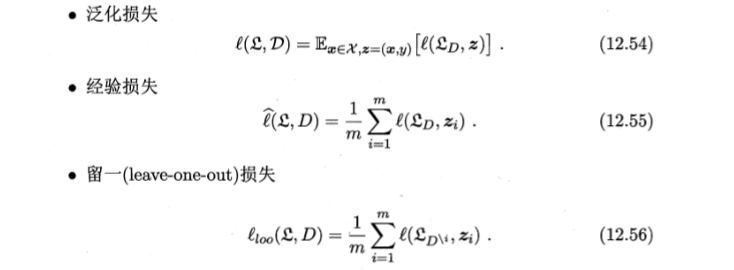

事实上，**若学习算法符合经验风险最小化原则（ERM）且满足β-均匀稳定性，则假设空间是可学习的**。稳定性通过损失函数与假设空间的可学习联系在了一起，区别在于：假设空间关注的是经验误差与泛化误差，需要考虑到所有可能的假设；而稳定性只关注当前的输出假设。